In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
!pip install chardet
import chardet
dataset = pd.read_csv('/content/drive/MyDrive/Developing_Countries_Final.csv')
dataset.head()

Mounted at /content/drive


,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,Post Created,...,Topic_4_Valence,Topic_5_Valence,Topic_6_Valence,Topic_7_Valence,Topic_8_Valence,Topic_9_Valence,Topic_10_Valence,Topic_11_Valence,FOG_Score,NRC_Emotions
0,Fossbytes,fossbytes,1.000650e+14,VIDEO_CREATOR,IN,Fossbytes is a media platform that simplifies ...,05-08-2014 18:28,2514101.0,7526099.0,2024-02-05 03:45:01 GMT,...,-0.000014,0.000224,0.012847,-0.000026,0.003858,-0.014566,-0.000012,-0.000131,16.49,"{'positive': 7, 'anticipation': 3, 'trust': 4}"
1,Fossbytes,fossbytes,1.000650e+14,VIDEO_CREATOR,IN,Fossbytes is a media platform that simplifies ...,05-08-2014 18:28,2512960.0,7514773.0,2024-02-02 20:10:01 GMT,...,-0.000011,0.000187,0.018316,-0.000021,0.009534,-0.000109,-0.000010,-0.000109,15.46,"{'positive': 7, 'negative': 1, 'joy': 1, 'surp..."
2,Tech Explorers,TechExplorerZone,1.000880e+14,NEWS_SITE,NaN,"Tech news, exclusive updates, and mind-bending...",17-11-2022 13:45,36199.0,128041.0,2024-01-31 09:09:54 GMT,...,-0.000021,0.014271,0.000235,-0.000038,0.005682,-0.007207,-0.000018,-0.004513,10.96,"{'anticipation': 2, 'negative': 1, 'positive':..."
3,Fossbytes,fossbytes,1.000650e+14,VIDEO_CREATOR,IN,Fossbytes is a media platform that simplifies ...,05-08-2014 18:28,2419553.0,6866994.0,2023-09-12 01:45:00 BST,...,-0.000011,0.008461,0.000131,-0.003094,0.008975,-0.004194,-0.000637,-0.000109,17.14,"{'fear': 1, 'anticipation': 2, 'positive': 4, ..."
4,Marketing Motivation,marketingmotivation.in,1.000640e+14,MEDIA_NEWS_COMPANY,IN,Official Facebook Page of Marketing Motivation.,02-10-2018 10:32,151817.0,161402.0,2022-03-17 17:24:23 GMT,...,-0.000032,0.000524,0.000363,-0.000060,0.004755,-0.000300,-0.000028,-0.000306,20.00,"{'joy': 3, 'positive': 4, 'trust': 1, 'surpris..."


In [3]:
# Importing the required libraries for the ML models
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import PartialDependenceDisplay
from sklearn.svm import SVR
import xgboost as xgb
import matplotlib.pyplot as plt

In [4]:
# Splitting the dataset according to requirements
dataset = dataset.drop(columns=['Page Name','User Name','Page Admin Top Country','Likes at Posting','Facebook Id','Page Category','Post Views','Total Views','Total Views For All Crossposts','Page Description','Page Created','Post Created','Post Created Date','Post Created Time','Video Share Status','Is Video Owner?','Video Length','URL','Message','Link','Final Link','Image Text','Link Text','Description','Sponsor Id','Sponsor Name','Sponsor Category','Combined Text','Total Interactions (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )','Care','Sad','Love','Wow','Angry','Haha','Shares','Comments','Likes','Overperforming Score'])

In [5]:
video_types = ['Video', 'Live Video Complete', 'Live Video Schedule', 'Native Video']
photo_types = ['Photo']
link_types = ['Link']
youtube_types = ['YouTube']

dataset['IsVideo'] = dataset['Type'].apply(lambda x: 1 if x in video_types else 0)
dataset['IsPhoto'] = dataset['Type'].apply(lambda x: 1 if x in photo_types else 0)
dataset['IsLink'] = dataset['Type'].apply(lambda x: 1 if x in link_types else 0)
dataset['IsYouTube'] = dataset['Type'].apply(lambda x: 1 if x in youtube_types else 0)

dataset.drop('Type', axis=1, inplace=True)
dataset

,Followers at Posting,Total Interactions,Topic_1_Distribution,Topic_2_Distribution,Topic_3_Distribution,Topic_4_Distribution,Topic_5_Distribution,Topic_6_Distribution,Topic_7_Distribution,Topic_8_Distribution,...,Topic_8_Valence,Topic_9_Valence,Topic_10_Valence,Topic_11_Valence,FOG_Score,NRC_Emotions,IsVideo,IsPhoto,IsLink,IsYouTube
0,7526099.0,"2,79,355",0.002501,0.001485,0.001799,0.000583,0.001050,0.291129,0.001757,0.231473,...,0.003858,-0.014566,-0.000012,-0.000131,16.49,"{'positive': 7, 'anticipation': 3, 'trust': 4}",0,1,0,0
1,7514773.0,"2,32,165",0.002076,0.001235,0.001496,0.000484,0.000872,0.415079,0.001461,0.572057,...,0.009534,-0.000109,-0.000010,-0.000109,15.46,"{'positive': 7, 'negative': 1, 'joy': 1, 'surp...",0,1,0,0
2,128041.0,"1,50,850",0.292195,0.002225,0.002695,0.000873,0.066759,0.005316,0.002633,0.340893,...,0.005682,-0.007207,-0.000018,-0.004513,10.96,"{'anticipation': 2, 'negative': 1, 'positive':...",0,1,0,0
3,6866994.0,"1,22,101",0.002086,0.040409,0.001497,0.000485,0.039580,0.002969,0.212193,0.538502,...,0.008975,-0.004194,-0.000637,-0.000109,17.14,"{'fear': 1, 'anticipation': 2, 'positive': 4, ...",0,1,0,0
4,161402.0,"59,870",0.676352,0.003469,0.004202,0.001361,0.002451,0.008235,0.004104,0.285315,...,0.004755,-0.000300,-0.000028,-0.000306,20.00,"{'joy': 3, 'positive': 4, 'trust': 1, 'surpris...",0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5816,2515.0,30,0.367944,0.002165,0.077902,0.000850,0.001530,0.458973,0.076333,0.005000,...,0.000083,-0.000195,-0.000017,-0.000191,10.76,"{'fear': 1, 'negative': 1, 'anticipation': 2, ...",0,1,0,0
5817,2150835.0,30,0.099295,0.002758,0.003341,0.001082,0.001949,0.006587,0.003263,0.172505,...,0.002875,-0.017171,-0.000022,-0.013018,8.04,"{'positive': 1, 'trust': 1}",1,0,0,0
5818,11190.0,30,0.001011,0.064595,0.026351,0.000236,0.000424,0.254163,0.185987,0.001398,...,0.000023,-0.009957,-0.000005,-0.012050,17.92,"{'joy': 3, 'positive': 15, 'trust': 10, 'negat...",1,0,0,0
5819,662245.0,30,0.249853,0.002960,0.003586,0.001161,0.002092,0.356807,0.003502,0.006997,...,0.000117,-0.011527,-0.000024,-0.000261,17.39,"{'disgust': 1, 'anticipation': 1, 'positive': ...",0,0,1,0


In [7]:
# Splitting the dataset for the baseline model
dataset1 = dataset.drop(columns=['Topic_1_Distribution','Topic_2_Distribution','Topic_3_Distribution','Topic_4_Distribution','Topic_5_Distribution','Topic_6_Distribution','Topic_7_Distribution','Topic_8_Distribution','Topic_9_Distribution','Topic_10_Distribution','Topic_11_Distribution','Topic_1_Valence','Topic_2_Valence','Topic_3_Valence','Topic_4_Valence','Topic_5_Valence','Topic_6_Valence','Topic_7_Valence','Topic_8_Valence','Topic_9_Valence','Topic_10_Valence','Topic_11_Valence','FOG_Score','NRC_Emotions'])
dataset1

,Followers at Posting,Total Interactions,IsVideo,IsPhoto,IsLink,IsYouTube
0,7526099.0,"2,79,355",0,1,0,0
1,7514773.0,"2,32,165",0,1,0,0
2,128041.0,"1,50,850",0,1,0,0
3,6866994.0,"1,22,101",0,1,0,0
4,161402.0,"59,870",0,1,0,0
...,...,...,...,...,...,...
5816,2515.0,30,0,1,0,0
5817,2150835.0,30,1,0,0,0
5818,11190.0,30,1,0,0,0
5819,662245.0,30,0,0,1,0


In [8]:
# Function to clean and convert columns to numeric
def clean_column(column):
  return pd.to_numeric(column.str.replace(',', ''), errors='coerce', downcast='float')

for column in dataset1.columns:
    if dataset1[column].dtype == 'object':
        try:
            dataset1[column] = clean_column(dataset1[column])
        except Exception as e:
            print(f"Could not convert column {column}: {e}")

# Calculating mean and standard deviation for each column
column_means = dataset1.mean()
column_std = dataset1.std()

# Standardizing each entry in the dataset
for column in dataset1.columns:
    if dataset1[column].dtype != 'object':
        dataset1[column] = (dataset1[column] - column_means[column]) / column_std[column]

dataset1

,Followers at Posting,Total Interactions,IsVideo,IsPhoto,IsLink,IsYouTube
0,0.511104,47.427536,-0.350201,0.942958,-0.687907,-0.132199
1,0.510007,39.394848,-0.350201,0.942958,-0.687907,-0.132199
2,-0.205254,25.553387,-0.350201,0.942958,-0.687907,-0.132199
3,0.447282,20.659723,-0.350201,0.942958,-0.687907,-0.132199
4,-0.202023,10.066747,-0.350201,0.942958,-0.687907,-0.132199
...,...,...,...,...,...,...
5816,-0.217408,-0.119233,-0.350201,0.942958,-0.687907,-0.132199
5817,-0.009386,-0.119233,2.855016,-1.060311,-0.687907,-0.132199
5818,-0.216568,-0.119233,2.855016,-1.060311,-0.687907,-0.132199
5819,-0.153526,-0.119233,-0.350201,-1.060311,1.453434,-0.132199


                 Generalized Linear Model Regression Results                  
Dep. Variable:     Total Interactions   No. Observations:                 4452
Model:                            GLM   Df Residuals:                     4446
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4906.9
Date:                Fri, 12 Jul 2024   Deviance:                       1094.9
Time:                        10:37:21   Pearson chi2:                 5.31e+03
No. Iterations:                     5   Pseudo R-squ. (CS):           0.002465
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0026 

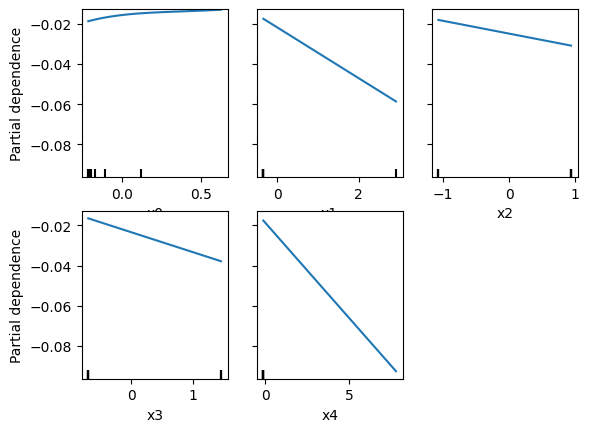

In [9]:
dataset1 = dataset1.dropna()
X = dataset1.drop(columns=['Total Interactions'])
y = dataset1['Total Interactions']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Model
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'objective': 'reg:squarederror', 'max_depth': 4, 'eta': 0.1}
num_rounds = 100
bst = xgb.train(params, dtrain, num_rounds)
preds_in = bst.predict(dtrain)
preds_out = bst.predict(dtest)
mseXG_in = mean_squared_error(y_train, preds_in)
mseXG_out = mean_squared_error(y_test, preds_out)
rmseXG_in = np.sqrt(mseXG_in)
rmseXG_out = np.sqrt(mseXG_out)
r2XG_in = r2_score(y_train, preds_in)
r2XG_out = r2_score(y_test, preds_out)

# Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf_in = rf.predict(X_train)
y_pred_rf_out = rf.predict(X_test)
mseRF_in = mean_squared_error(y_train, y_pred_rf_in)
mseRF_out = mean_squared_error(y_test, y_pred_rf_out)
rmseRF_in = np.sqrt(mseRF_in)
rmseRF_out = np.sqrt(mseRF_out)
r2RF_in = r2_score(y_train, y_pred_rf_in)
r2RF_out = r2_score(y_test, y_pred_rf_out)

# SVR Model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(X_train_scaled, y_train)
y_pred_svr_in = svr.predict(X_train_scaled)
y_pred_svr_out = svr.predict(X_test_scaled)
mseSVR_in = mean_squared_error(y_train, y_pred_svr_in)
mseSVR_out = mean_squared_error(y_test, y_pred_svr_out)
rmseSVR_in = np.sqrt(mseSVR_in)
rmseSVR_out = np.sqrt(mseSVR_out)
r2SVR_in = r2_score(y_train, y_pred_svr_in)
r2SVR_out = r2_score(y_test, y_pred_svr_out)

# Poisson Regression
y_train = y_train + 1
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)
poissonModel = sm.GLM(y_train, X_train_const, family=sm.families.Poisson()).fit()
y_pred_poisson_in = poissonModel.predict(X_train_const)
y_pred_poisson_out = poissonModel.predict(X_test_const)
msePR_in = mean_squared_error(y_train, y_pred_poisson_in)
msePR_out = mean_squared_error(y_test, y_pred_poisson_out)
rmsePR_in = np.sqrt(msePR_in)
rmsePR_out = np.sqrt(msePR_out)
r2PR_in = r2_score(y_train, y_pred_poisson_in)
r2PR_out = r2_score(y_test, y_pred_poisson_out)

# Print the summary of Poisson Regression model
print(poissonModel.summary())

# Print RMSE, MSE, and R² for both in-sample and out-sample
print(f"XGBoost - In-sample RMSE: {rmseXG_in}, MSE: {mseXG_in}, R²: {r2XG_in}")
print(f"XGBoost - Out-sample RMSE: {rmseXG_out}, MSE: {mseXG_out}, R²: {r2XG_out}")
print(f"Random Forest - In-sample RMSE: {rmseRF_in}, MSE: {mseRF_in}, R²: {r2RF_in}")
print(f"Random Forest - Out-sample RMSE: {rmseRF_out}, MSE: {mseRF_out}, R²: {r2RF_out}")
print(f"SVR - In-sample RMSE: {rmseSVR_in}, MSE: {mseSVR_in}, R²: {r2SVR_in}")
print(f"SVR - Out-sample RMSE: {rmseSVR_out}, MSE: {mseSVR_out}, R²: {r2SVR_out}")
print(f"Poisson Regression - In-sample RMSE: {rmsePR_in}, MSE: {msePR_in}, R²: {r2PR_in}")
print(f"Poisson Regression - Out-sample RMSE: {rmsePR_out}, MSE: {msePR_out}, R²: {r2PR_out}")

# Finding out the best model based on multiple metrics
metrics = {
    'XGBoost': {'RMSE_in': rmseXG_in, 'MSE_in': mseXG_in, 'R²_in': r2XG_in, 'RMSE_out': rmseXG_out, 'MSE_out': mseXG_out, 'R²_out': r2XG_out},
    'Random Forest': {'RMSE_in': rmseRF_in, 'MSE_in': mseRF_in, 'R²_in': r2RF_in, 'RMSE_out': rmseRF_out, 'MSE_out': mseRF_out, 'R²_out': r2RF_out},
    'SVR': {'RMSE_in': rmseSVR_in, 'MSE_in': mseSVR_in, 'R²_in': r2SVR_in, 'RMSE_out': rmseSVR_out, 'MSE_out': mseSVR_out, 'R²_out': r2SVR_out},
    'Poisson Regression': {'RMSE_in': rmsePR_in, 'MSE_in': msePR_in, 'R²_in': r2PR_in, 'RMSE_out': rmsePR_out, 'MSE_out': msePR_out, 'R²_out': r2PR_out}
}

# Determine the best model based on each metric
best_model_name_rmse_in = min(metrics, key=lambda x: metrics[x]['RMSE_in'])
best_model_name_mse_in = min(metrics, key=lambda x: metrics[x]['MSE_in'])
best_model_name_r2_in = max(metrics, key=lambda x: metrics[x]['R²_in'])
best_model_name_rmse_out = min(metrics, key=lambda x: metrics[x]['RMSE_out'])
best_model_name_mse_out = min(metrics, key=lambda x: metrics[x]['MSE_out'])
best_model_name_r2_out = max(metrics, key=lambda x: metrics[x]['R²_out'])

best_models = [
    best_model_name_rmse_in, best_model_name_mse_in, best_model_name_r2_in,
    best_model_name_rmse_out, best_model_name_mse_out, best_model_name_r2_out
]
best_model_counts = {model: best_models.count(model) for model in set(best_models)}

best_model_name = max(best_model_counts, key=best_model_counts.get)

print(f"Best Predictive Model: {best_model_name}")

# Plotting the Feature Importance for the best model
if best_model_name == 'XGBoost':
    model = xgb.XGBRegressor()
    model.fit(X_train, y_train)
    importance = model.feature_importances_
    features = X_train.columns
    print("Feature Importance Scores for XGBoost:")
    for feature, score in zip(features, importance):
        print(f"{feature}: {score}")
    plt.figure(figsize=(10, 6))
    plt.barh(features, importance)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance for XGBoost')
    plt.show()
elif best_model_name == 'Random Forest':
    importance = rf.feature_importances_
    features = X_train.columns
    print("Feature Importance Scores for Random Forest:")
    for feature, score in zip(features, importance):
        print(f"{feature}: {score}")
    plt.figure(figsize=(10, 6))
    plt.barh(features, importance)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance for Random Forest')
    plt.show()
elif best_model_name == 'SVR':
    print("SVR does not have built-in feature importance.")
else:
    print("Feature importance plots are not typically used for Poisson Regression.")

# Plotting the Partial Dependency Graphs for the best model
if best_model_name == 'XGBoost':
    display(PartialDependenceDisplay.from_estimator(model, X_train, features=[i for i in range(X_train.shape[1])]))
elif best_model_name == 'Random Forest':
    display(PartialDependenceDisplay.from_estimator(rf, X_train, features=[i for i in range(X_train.shape[1])]))
elif best_model_name == 'SVR':
    display(PartialDependenceDisplay.from_estimator(svr, X_train_scaled, features=[i for i in range(X_train_scaled.shape[1])]))
else:
    print("Partial dependence plots are not typically used for Poisson Regression.")

Correlation Matrix:
                      Followers at Posting   IsVideo   IsPhoto    IsLink  \
Followers at Posting              1.000000  0.048894 -0.067947  0.056378   
IsVideo                           0.048894  1.000000 -0.366714 -0.237670   
IsPhoto                          -0.067947 -0.366714  1.000000 -0.738425   
IsLink                            0.056378 -0.237670 -0.738425  1.000000   
IsYouTube                        -0.025173 -0.044048 -0.136854 -0.088696   

                      IsYouTube  
Followers at Posting  -0.025173  
IsVideo               -0.044048  
IsPhoto               -0.136854  
IsLink                -0.088696  
IsYouTube              1.000000  


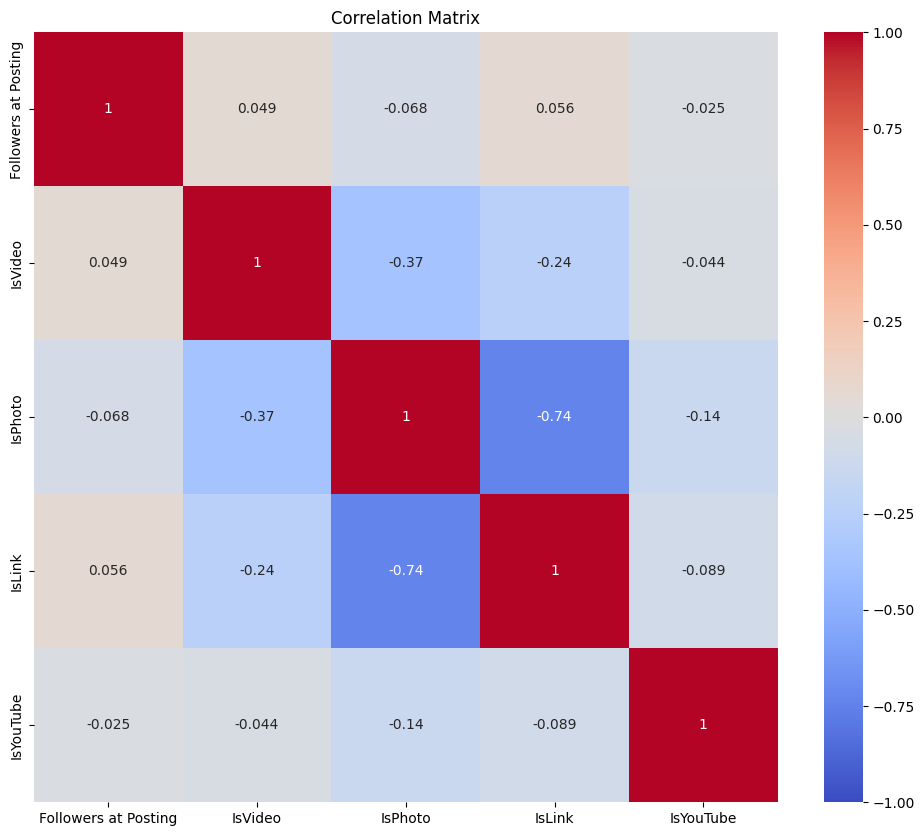

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute the correlation matrix
correlation_matrix = X_train.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

In [11]:
# Baseline + Topic Distribution Model
dataset2 = dataset.drop(columns=['Topic_1_Valence','Topic_2_Valence','Topic_3_Valence','Topic_4_Valence','Topic_5_Valence','Topic_6_Valence','Topic_7_Valence','Topic_8_Valence','Topic_9_Valence','Topic_10_Valence','Topic_11_Valence','FOG_Score','NRC_Emotions'])

In [12]:
# Function to clean and convert columns to numeric
def clean_column(column):
  return pd.to_numeric(column.str.replace(',', ''), errors='coerce', downcast='float')

for column in dataset2.columns:
    if dataset2[column].dtype == 'object':
        try:
            dataset2[column] = clean_column(dataset2[column])
        except Exception as e:
            print(f"Could not convert column {column}: {e}")

# Calculating mean and standard deviation for each column
column_means = dataset2.mean()
column_std = dataset2.std()

# Standardizing each entry in the dataset
for column in dataset2.columns:
    if dataset2[column].dtype != 'object':
        dataset2[column] = (dataset2[column] - column_means[column]) / column_std[column]
dataset2

,Followers at Posting,Total Interactions,Topic_1_Distribution,Topic_2_Distribution,Topic_3_Distribution,Topic_4_Distribution,Topic_5_Distribution,Topic_6_Distribution,Topic_7_Distribution,Topic_8_Distribution,Topic_9_Distribution,Topic_10_Distribution,Topic_11_Distribution,IsVideo,IsPhoto,IsLink,IsYouTube
0,0.511104,47.427536,-0.576226,-0.384756,-0.448922,-0.173450,-0.297302,0.503234,-0.486965,0.218898,1.182958,-0.158475,-0.469643,-0.350201,0.942958,-0.687907,-0.132199
1,0.510007,39.394848,-0.578531,-0.386809,-0.451021,-0.174723,-0.298447,1.037234,-0.488606,1.624458,-0.787923,-0.159670,-0.471435,-0.350201,0.942958,-0.687907,-0.132199
2,-0.205254,25.553387,0.995473,-0.378698,-0.442729,-0.169694,0.127307,-0.728097,-0.482123,0.670465,0.179633,-0.154949,-0.114724,-0.350201,0.942958,-0.687907,-0.132199
3,0.447282,20.659723,-0.578478,-0.065963,-0.451010,-0.174716,-0.048321,-0.738206,0.677315,1.485982,-0.231022,0.210704,-0.471425,-0.350201,0.942958,-0.687907,-0.132199
4,-0.202023,10.066747,3.079665,-0.368513,-0.432312,-0.163377,-0.288246,-0.715520,-0.473983,0.441101,-0.761890,-0.149020,-0.455467,-0.350201,0.942958,-0.687907,-0.132199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5816,-0.217408,-0.119233,1.406439,-0.379186,0.077214,-0.169996,-0.294197,1.226337,-0.074358,-0.715734,-0.776229,-0.155233,-0.464781,-0.350201,0.942958,-0.687907,-0.132199
5817,-0.009386,-0.119233,-0.051079,-0.374334,-0.438265,-0.166987,-0.291491,-0.722618,-0.478635,-0.024457,1.538045,-0.152408,0.574290,2.855016,-1.060311,-0.687907,-0.132199
5818,-0.216568,-0.119233,-0.584309,0.132127,-0.279187,-0.177946,-0.301344,0.343980,0.532328,-0.730601,0.554652,-0.162694,0.495808,2.855016,-1.060311,-0.687907,-0.132199
5819,-0.153526,-0.119233,0.765753,-0.372680,-0.436572,-0.165961,-0.290569,0.786187,-0.477314,-0.707493,0.768580,-0.151446,-0.459103,-0.350201,-1.060311,1.453434,-0.132199


                 Generalized Linear Model Regression Results                  
Dep. Variable:     Total Interactions   No. Observations:                 4452
Model:                            GLM   Df Residuals:                     4435
Model Family:                 Poisson   Df Model:                           16
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4890.3
Date:                Fri, 12 Jul 2024   Deviance:                       1061.7
Time:                        10:39:19   Pearson chi2:                 4.78e+03
No. Iterations:                     5   Pseudo R-squ. (CS):           0.009878
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

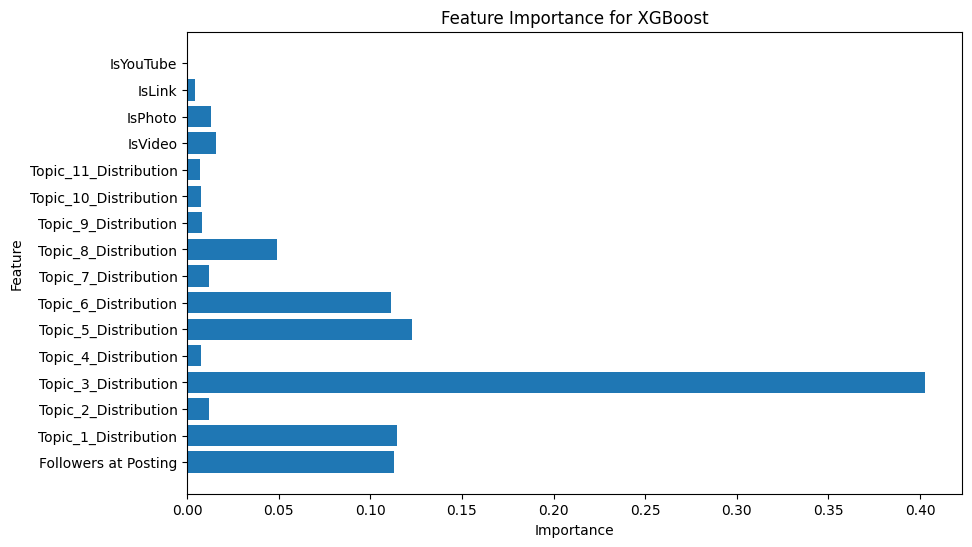

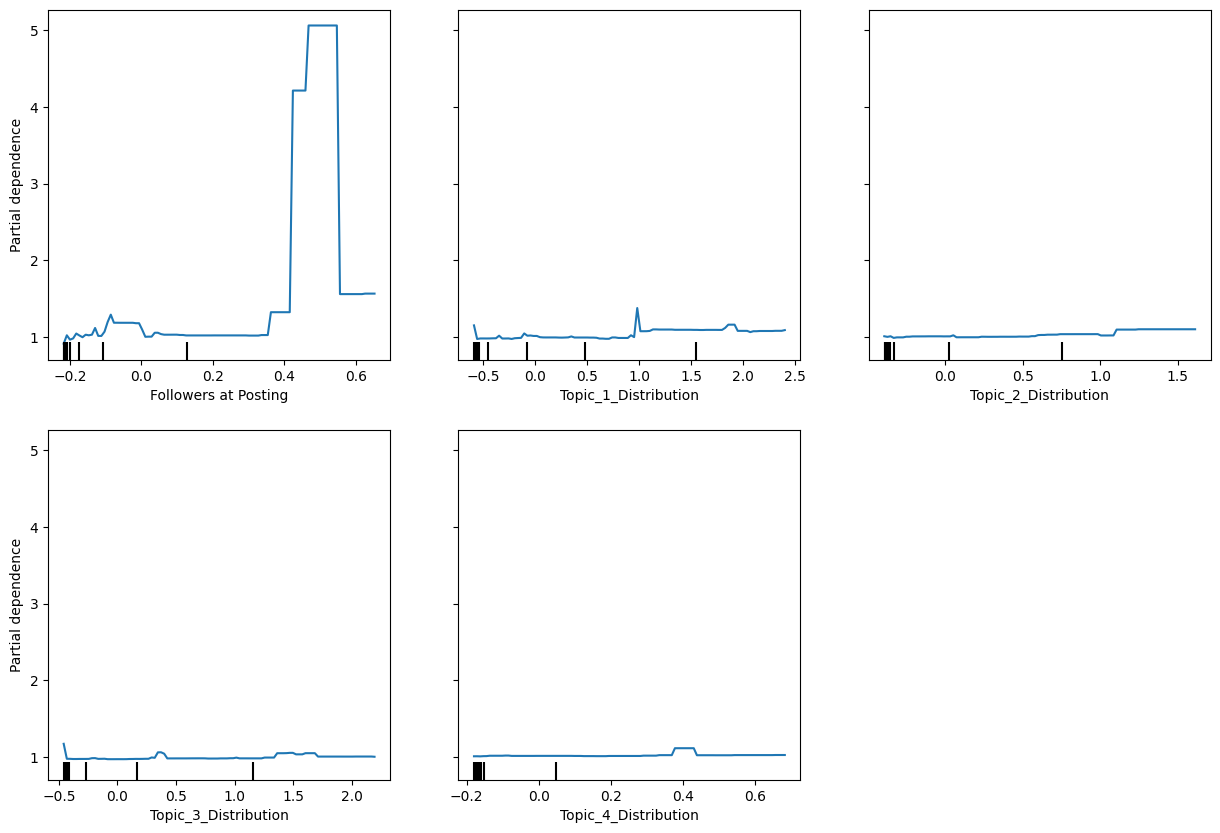

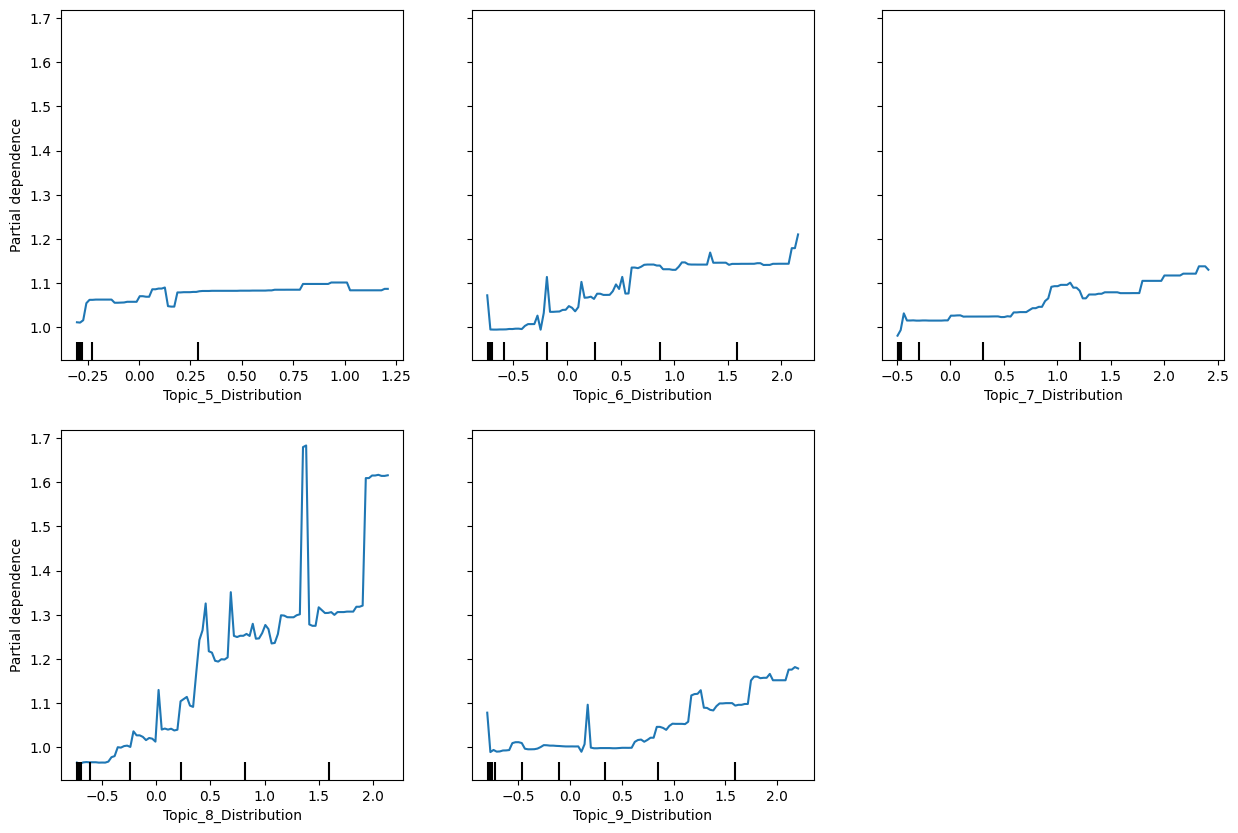

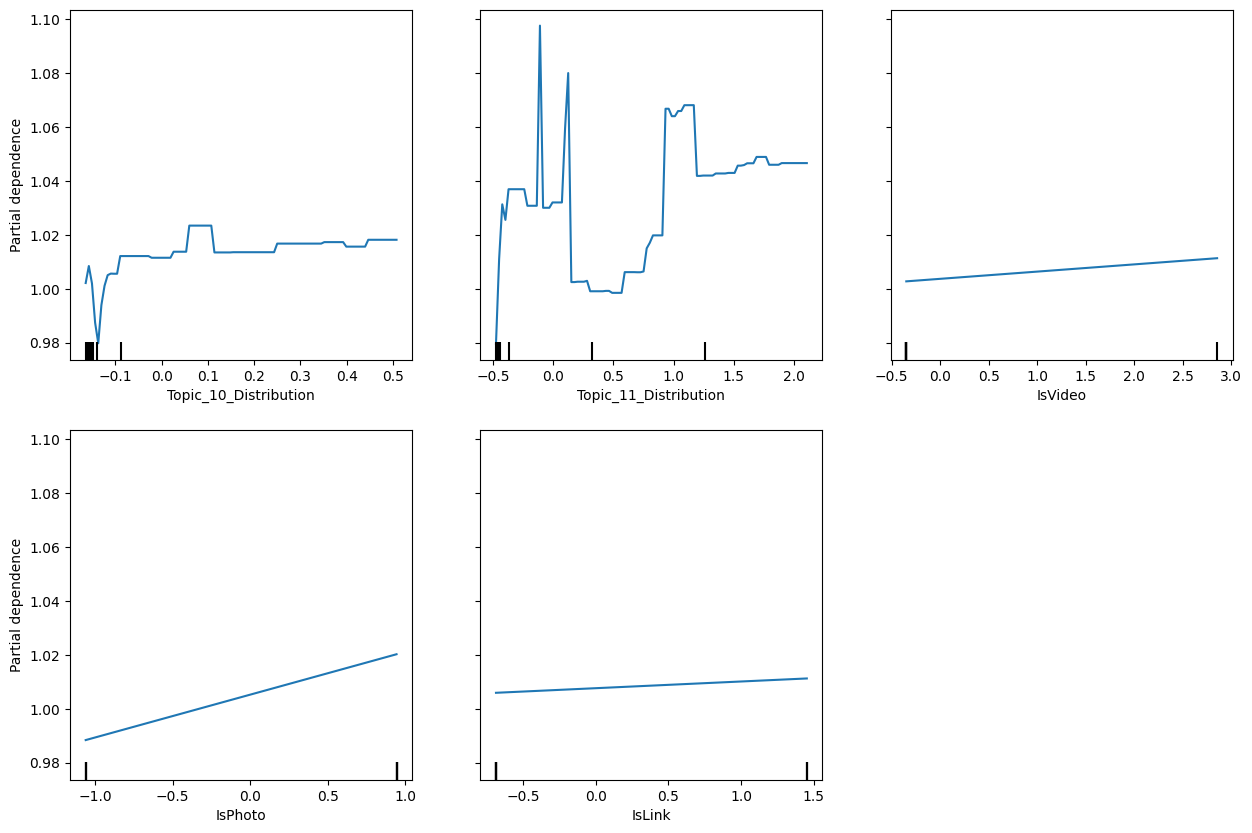

/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


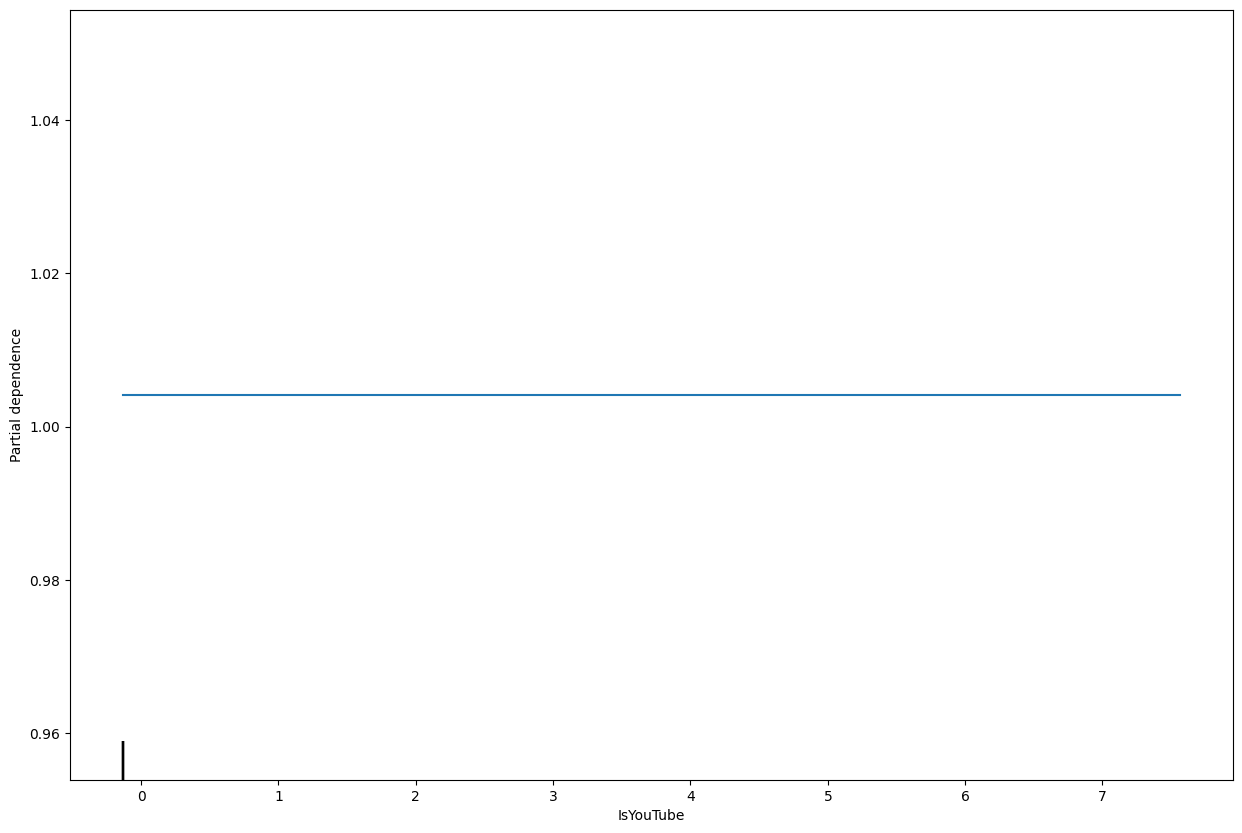

In [13]:
dataset2 = dataset2.dropna()
X = dataset2.drop(columns=['Total Interactions'])
y = dataset2['Total Interactions']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Model
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'objective': 'reg:squarederror', 'max_depth': 4, 'eta': 0.1}
num_rounds = 100
bst = xgb.train(params, dtrain, num_rounds)
preds_in = bst.predict(dtrain)
preds_out = bst.predict(dtest)
mseXG_in = mean_squared_error(y_train, preds_in)
mseXG_out = mean_squared_error(y_test, preds_out)
rmseXG_in = np.sqrt(mseXG_in)
rmseXG_out = np.sqrt(mseXG_out)
r2XG_in = r2_score(y_train, preds_in)
r2XG_out = r2_score(y_test, preds_out)

# Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf_in = rf.predict(X_train)
y_pred_rf_out = rf.predict(X_test)
mseRF_in = mean_squared_error(y_train, y_pred_rf_in)
mseRF_out = mean_squared_error(y_test, y_pred_rf_out)
rmseRF_in = np.sqrt(mseRF_in)
rmseRF_out = np.sqrt(mseRF_out)
r2RF_in = r2_score(y_train, y_pred_rf_in)
r2RF_out = r2_score(y_test, y_pred_rf_out)

# SVR Model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(X_train_scaled, y_train)
y_pred_svr_in = svr.predict(X_train_scaled)
y_pred_svr_out = svr.predict(X_test_scaled)
mseSVR_in = mean_squared_error(y_train, y_pred_svr_in)
mseSVR_out = mean_squared_error(y_test, y_pred_svr_out)
rmseSVR_in = np.sqrt(mseSVR_in)
rmseSVR_out = np.sqrt(mseSVR_out)
r2SVR_in = r2_score(y_train, y_pred_svr_in)
r2SVR_out = r2_score(y_test, y_pred_svr_out)

# Poisson Regression
y_train = y_train + 1
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)
poissonModel = sm.GLM(y_train, X_train_const, family=sm.families.Poisson()).fit()
y_pred_poisson_in = poissonModel.predict(X_train_const)
y_pred_poisson_out = poissonModel.predict(X_test_const)
msePR_in = mean_squared_error(y_train, y_pred_poisson_in)
msePR_out = mean_squared_error(y_test, y_pred_poisson_out)
rmsePR_in = np.sqrt(msePR_in)
rmsePR_out = np.sqrt(msePR_out)
r2PR_in = r2_score(y_train, y_pred_poisson_in)
r2PR_out = r2_score(y_test, y_pred_poisson_out)

# Print the summary of Poisson Regression model
print(poissonModel.summary())

# Print RMSE, MSE, and R² for both in-sample and out-sample
print(f"XGBoost - In-sample RMSE: {rmseXG_in}, MSE: {mseXG_in}, R²: {r2XG_in}")
print(f"XGBoost - Out-sample RMSE: {rmseXG_out}, MSE: {mseXG_out}, R²: {r2XG_out}")
print(f"Random Forest - In-sample RMSE: {rmseRF_in}, MSE: {mseRF_in}, R²: {r2RF_in}")
print(f"Random Forest - Out-sample RMSE: {rmseRF_out}, MSE: {mseRF_out}, R²: {r2RF_out}")
print(f"SVR - In-sample RMSE: {rmseSVR_in}, MSE: {mseSVR_in}, R²: {r2SVR_in}")
print(f"SVR - Out-sample RMSE: {rmseSVR_out}, MSE: {mseSVR_out}, R²: {r2SVR_out}")
print(f"Poisson Regression - In-sample RMSE: {rmsePR_in}, MSE: {msePR_in}, R²: {r2PR_in}")
print(f"Poisson Regression - Out-sample RMSE: {rmsePR_out}, MSE: {msePR_out}, R²: {r2PR_out}")

# Finding out the best model based on multiple metrics
metrics = {
    'XGBoost': {'RMSE_in': rmseXG_in, 'MSE_in': mseXG_in, 'R²_in': r2XG_in, 'RMSE_out': rmseXG_out, 'MSE_out': mseXG_out, 'R²_out': r2XG_out},
    'Random Forest': {'RMSE_in': rmseRF_in, 'MSE_in': mseRF_in, 'R²_in': r2RF_in, 'RMSE_out': rmseRF_out, 'MSE_out': mseRF_out, 'R²_out': r2RF_out},
    'SVR': {'RMSE_in': rmseSVR_in, 'MSE_in': mseSVR_in, 'R²_in': r2SVR_in, 'RMSE_out': rmseSVR_out, 'MSE_out': mseSVR_out, 'R²_out': r2SVR_out},
    'Poisson Regression': {'RMSE_in': rmsePR_in, 'MSE_in': msePR_in, 'R²_in': r2PR_in, 'RMSE_out': rmsePR_out, 'MSE_out': msePR_out, 'R²_out': r2PR_out}
}

# Determine the best model based on each metric
best_model_name_rmse_in = min(metrics, key=lambda x: metrics[x]['RMSE_in'])
best_model_name_mse_in = min(metrics, key=lambda x: metrics[x]['MSE_in'])
best_model_name_r2_in = max(metrics, key=lambda x: metrics[x]['R²_in'])
best_model_name_rmse_out = min(metrics, key=lambda x: metrics[x]['RMSE_out'])
best_model_name_mse_out = min(metrics, key=lambda x: metrics[x]['MSE_out'])
best_model_name_r2_out = max(metrics, key=lambda x: metrics[x]['R²_out'])

best_models = [
    best_model_name_rmse_in, best_model_name_mse_in, best_model_name_r2_in,
    best_model_name_rmse_out, best_model_name_mse_out, best_model_name_r2_out
]
best_model_counts = {model: best_models.count(model) for model in set(best_models)}

best_model_name = max(best_model_counts, key=best_model_counts.get)

print(f"Best Predictive Model: {best_model_name}")

# Plotting the Feature Importance for the best model
if best_model_name == 'XGBoost':
    model = xgb.XGBRegressor()
    model.fit(X_train, y_train)
    importance = model.feature_importances_
    features = X_train.columns
    print("Feature Importance Scores for XGBoost:")
    for feature, score in zip(features, importance):
        print(f"{feature}: {score}")
    plt.figure(figsize=(10, 6))
    plt.barh(features, importance)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance for XGBoost')
    plt.show()
elif best_model_name == 'Random Forest':
    importance = rf.feature_importances_
    features = X_train.columns
    print("Feature Importance Scores for Random Forest:")
    for feature, score in zip(features, importance):
        print(f"{feature}: {score}")
    plt.figure(figsize=(10, 6))
    plt.barh(features, importance)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance for Random Forest')
    plt.show()
elif best_model_name == 'SVR':
    print("SVR does not have built-in feature importance.")
else:
    print("Feature importance plots are not typically used for Poisson Regression.")

# Plotting the Partial Dependency Graphs for the best model
def plot_partial_dependence(model, X_train, n_features=5):
    features = [i for i in range(X_train.shape[1])]
    for i in range(0, len(features), n_features):
        subset = features[i:i + n_features]
        fig, ax = plt.subplots(figsize=(15, 10))
        PartialDependenceDisplay.from_estimator(model, X_train, features=subset, ax=ax)
        plt.show()

if best_model_name == 'XGBoost':
    plot_partial_dependence(model, X_train)
elif best_model_name == 'Random Forest':
    plot_partial_dependence(rf, X_train)
elif best_model_name == 'SVR':
    plot_partial_dependence(svr, X_train_scaled)
else:
    print("Partial dependence plots are not typically used for Poisson Regression.")

Correlation Matrix:
                       Followers at Posting  Topic_1_Distribution  \
Followers at Posting               1.000000             -0.039930   
Topic_1_Distribution              -0.039930              1.000000   
Topic_2_Distribution              -0.052396             -0.082421   
Topic_3_Distribution               0.129393             -0.027958   
Topic_4_Distribution              -0.021146             -0.049017   
Topic_5_Distribution              -0.039052             -0.142599   
Topic_6_Distribution               0.003162             -0.073628   
Topic_7_Distribution               0.031998             -0.196060   
Topic_8_Distribution               0.019793             -0.150243   
Topic_9_Distribution               0.004253             -0.169302   
Topic_10_Distribution             -0.019429             -0.040894   
Topic_11_Distribution             -0.054529             -0.119446   
IsVideo                            0.048894             -0.041059   
IsPhoto       

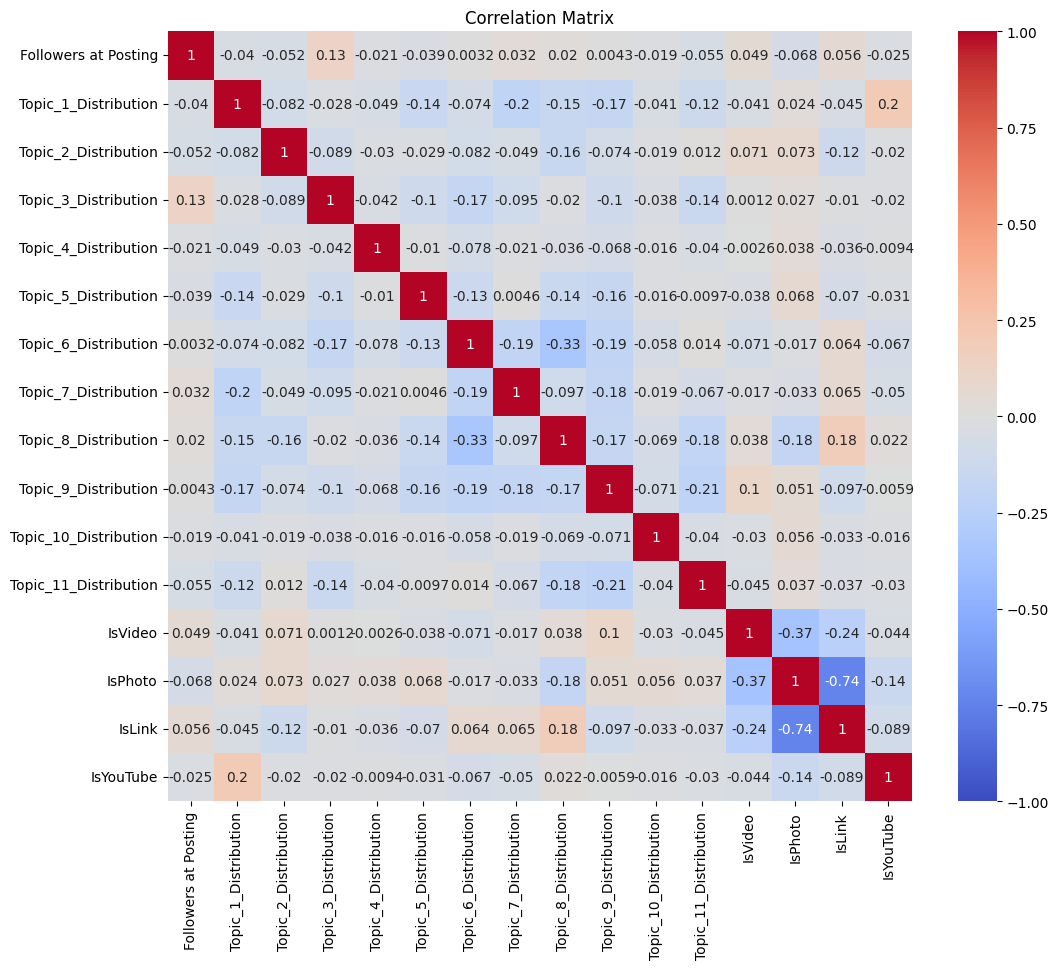

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute the correlation matrix
correlation_matrix = X_train.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

In [15]:
# Baseline + Topic Variance + topic distribution model
dataset3 = dataset.drop(columns=['FOG_Score','NRC_Emotions'])

In [16]:
# Function to clean and convert columns to numeric
def clean_column(column):
  return pd.to_numeric(column.str.replace(',', ''), errors='coerce', downcast='float')

for column in dataset3.columns:
    if dataset3[column].dtype == 'object':
        try:
            dataset3[column] = clean_column(dataset3[column])
        except Exception as e:
            print(f"Could not convert column {column}: {e}")

# Calculating mean and standard deviation for each column
column_means = dataset3.mean()
column_std = dataset3.std()

# Standardizing each entry in the dataset
for column in dataset3.columns:
    if dataset3[column].dtype != 'object':
        dataset3[column] = (dataset3[column] - column_means[column]) / column_std[column]
dataset3

,Followers at Posting,Total Interactions,Topic_1_Distribution,Topic_2_Distribution,Topic_3_Distribution,Topic_4_Distribution,Topic_5_Distribution,Topic_6_Distribution,Topic_7_Distribution,Topic_8_Distribution,...,Topic_6_Valence,Topic_7_Valence,Topic_8_Valence,Topic_9_Valence,Topic_10_Valence,Topic_11_Valence,IsVideo,IsPhoto,IsLink,IsYouTube
0,0.511104,47.427536,-0.576226,-0.384756,-0.448922,-0.173450,-0.297302,0.503234,-0.486965,0.218898,...,0.503234,0.486965,0.218898,-1.182958,0.158475,0.469643,-0.350201,0.942958,-0.687907,-0.132199
1,0.510007,39.394848,-0.578531,-0.386809,-0.451021,-0.174723,-0.298447,1.037234,-0.488606,1.624458,...,1.037234,0.488606,1.624458,0.787923,0.159670,0.471435,-0.350201,0.942958,-0.687907,-0.132199
2,-0.205254,25.553387,0.995473,-0.378698,-0.442729,-0.169694,0.127307,-0.728097,-0.482123,0.670465,...,-0.728097,0.482123,0.670465,-0.179633,0.154949,0.114724,-0.350201,0.942958,-0.687907,-0.132199
3,0.447282,20.659723,-0.578478,-0.065963,-0.451010,-0.174716,-0.048321,-0.738206,0.677315,1.485982,...,-0.738206,-0.677315,1.485982,0.231022,-0.210704,0.471425,-0.350201,0.942958,-0.687907,-0.132199
4,-0.202023,10.066747,3.079665,-0.368513,-0.432312,-0.163377,-0.288246,-0.715520,-0.473983,0.441101,...,-0.715520,0.473983,0.441101,0.761890,0.149020,0.455467,-0.350201,0.942958,-0.687907,-0.132199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5816,-0.217408,-0.119233,1.406439,-0.379186,0.077214,-0.169996,-0.294197,1.226337,-0.074358,-0.715734,...,1.226337,0.074358,-0.715734,0.776229,0.155233,0.464781,-0.350201,0.942958,-0.687907,-0.132199
5817,-0.009386,-0.119233,-0.051079,-0.374334,-0.438265,-0.166987,-0.291491,-0.722618,-0.478635,-0.024457,...,-0.722618,0.478635,-0.024457,-1.538045,0.152408,-0.574290,2.855016,-1.060311,-0.687907,-0.132199
5818,-0.216568,-0.119233,-0.584309,0.132127,-0.279187,-0.177946,-0.301344,0.343980,0.532328,-0.730601,...,0.343980,-0.532328,-0.730601,-0.554652,0.162694,-0.495808,2.855016,-1.060311,-0.687907,-0.132199
5819,-0.153526,-0.119233,0.765753,-0.372680,-0.436572,-0.165961,-0.290569,0.786187,-0.477314,-0.707493,...,0.786187,0.477314,-0.707493,-0.768580,0.151446,0.459103,-0.350201,-1.060311,1.453434,-0.132199


                 Generalized Linear Model Regression Results                  
Dep. Variable:     Total Interactions   No. Observations:                 4452
Model:                            GLM   Df Residuals:                     4424
Model Family:                 Poisson   Df Model:                           27
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4886.4
Date:                Fri, 12 Jul 2024   Deviance:                       1053.9
Time:                        10:41:39   Pearson chi2:                 4.59e+03
No. Iterations:                     8   Pseudo R-squ. (CS):            0.01163
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

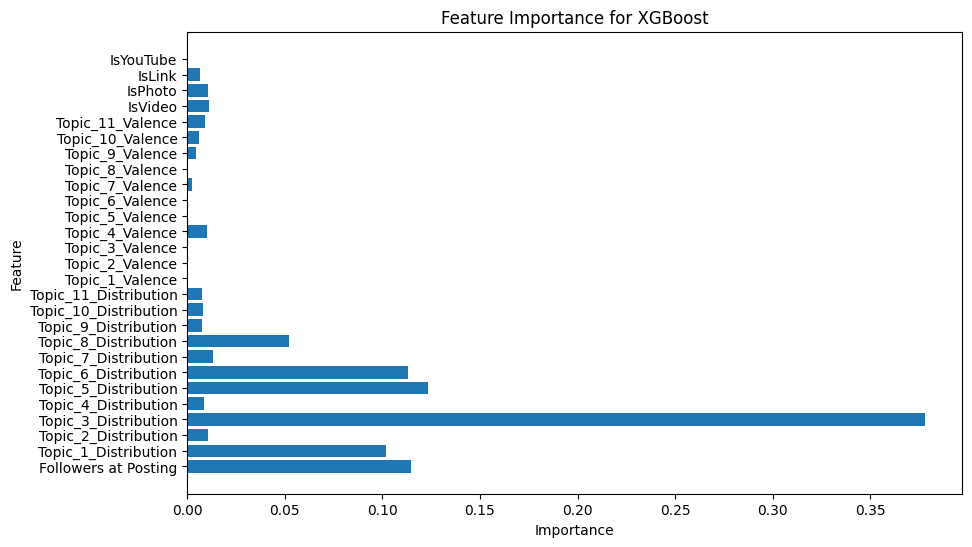

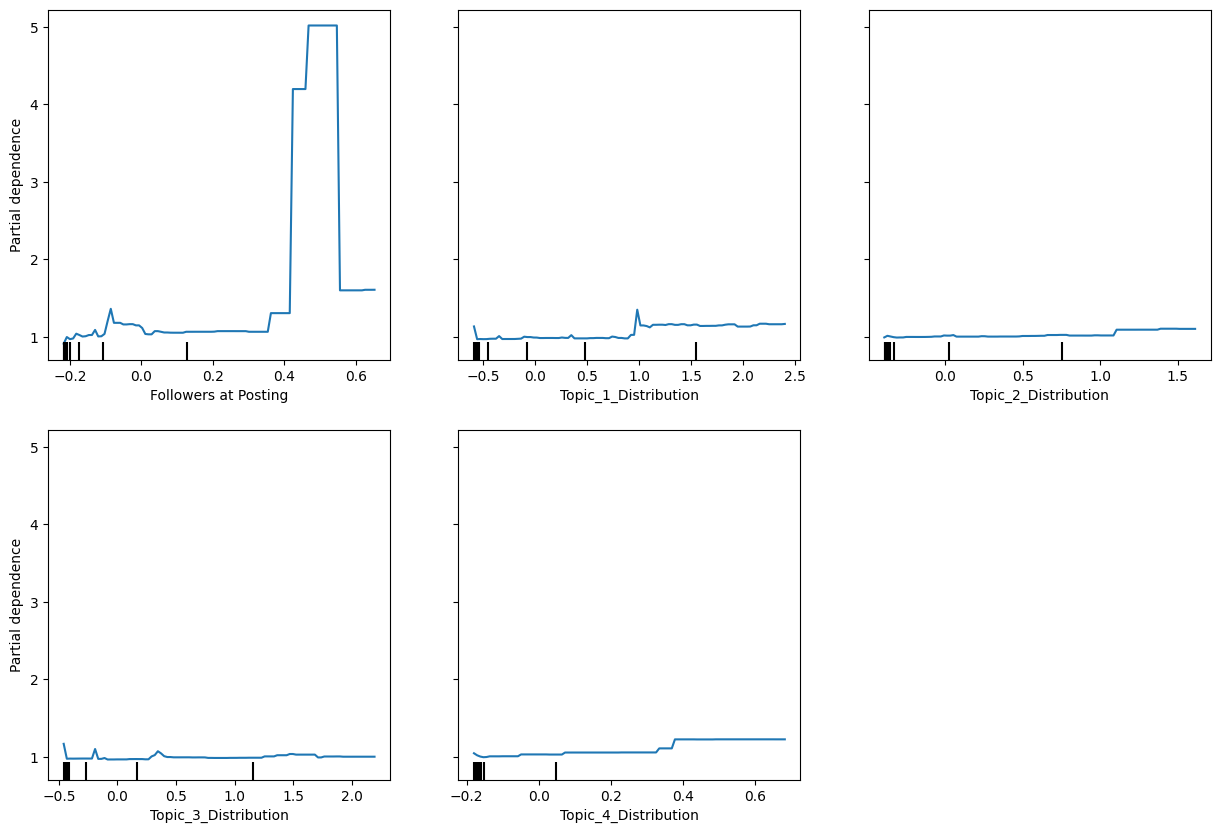

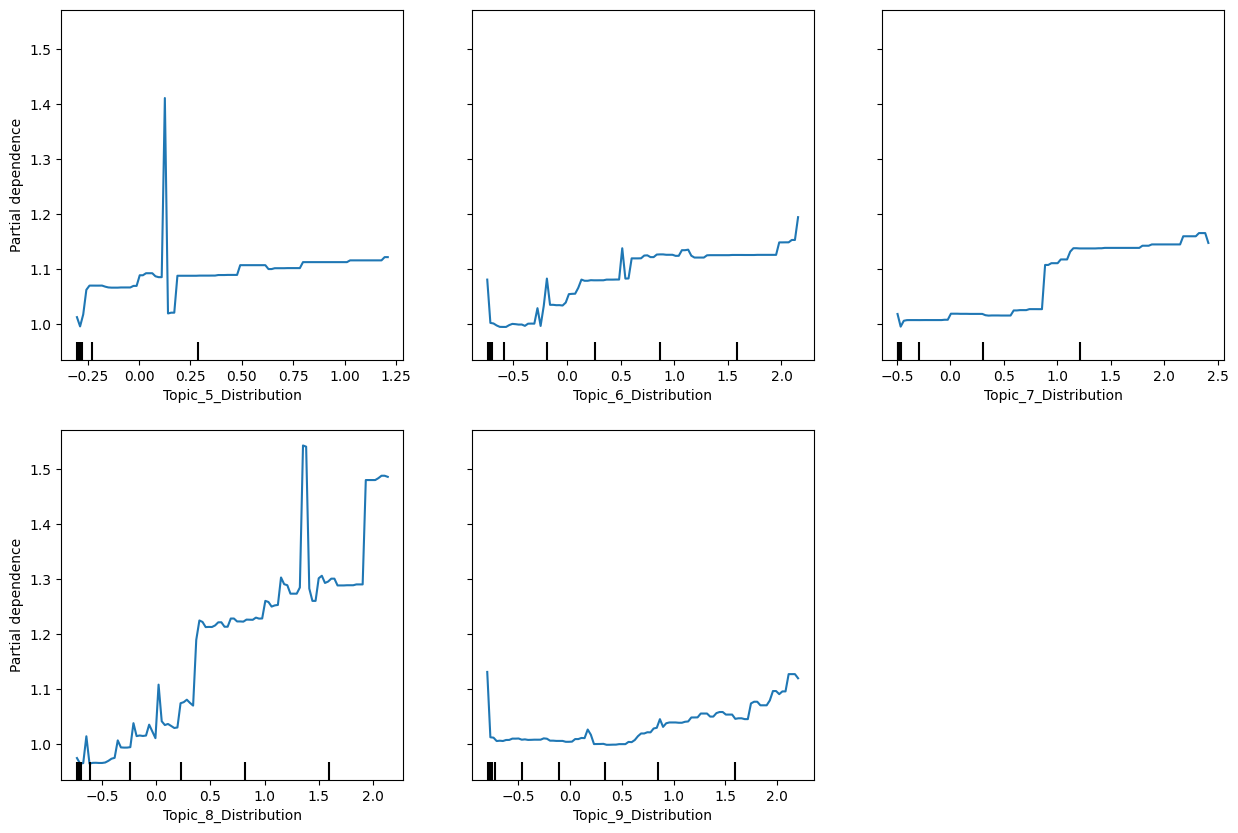

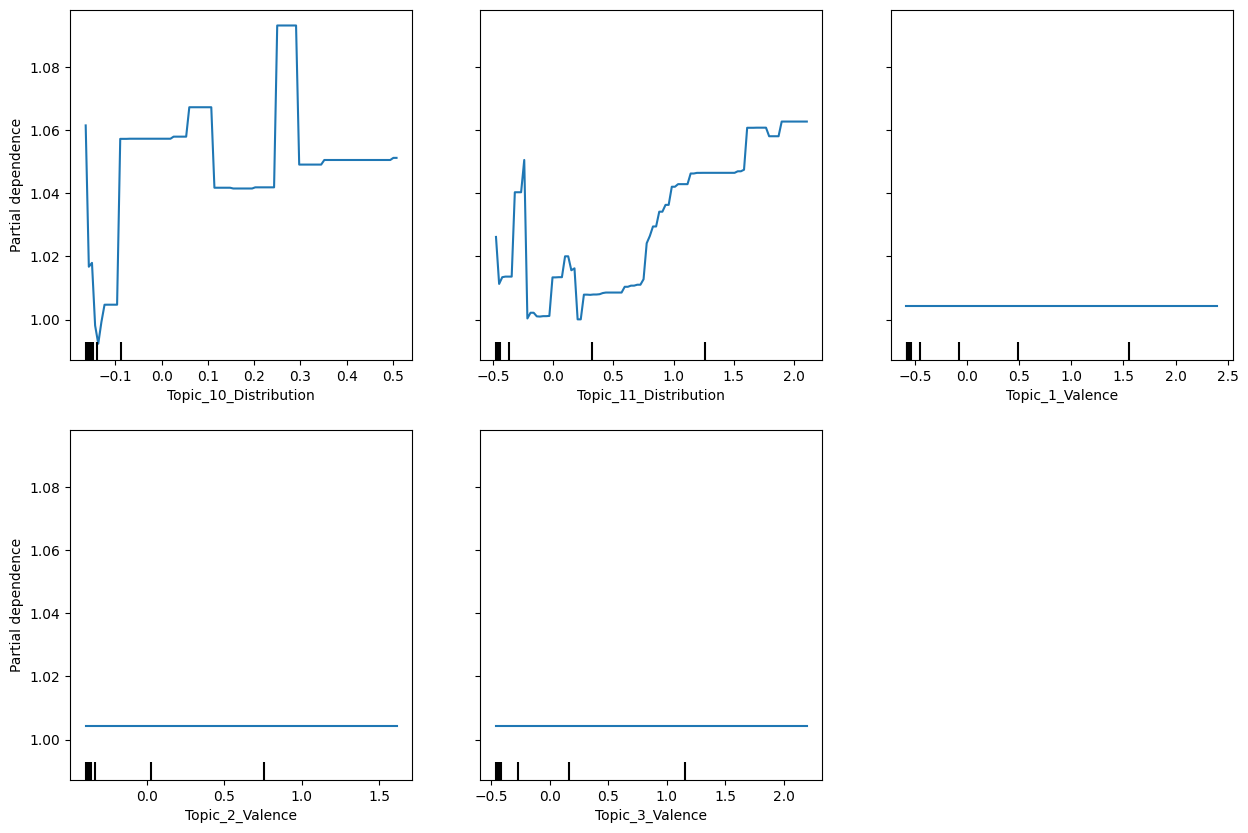

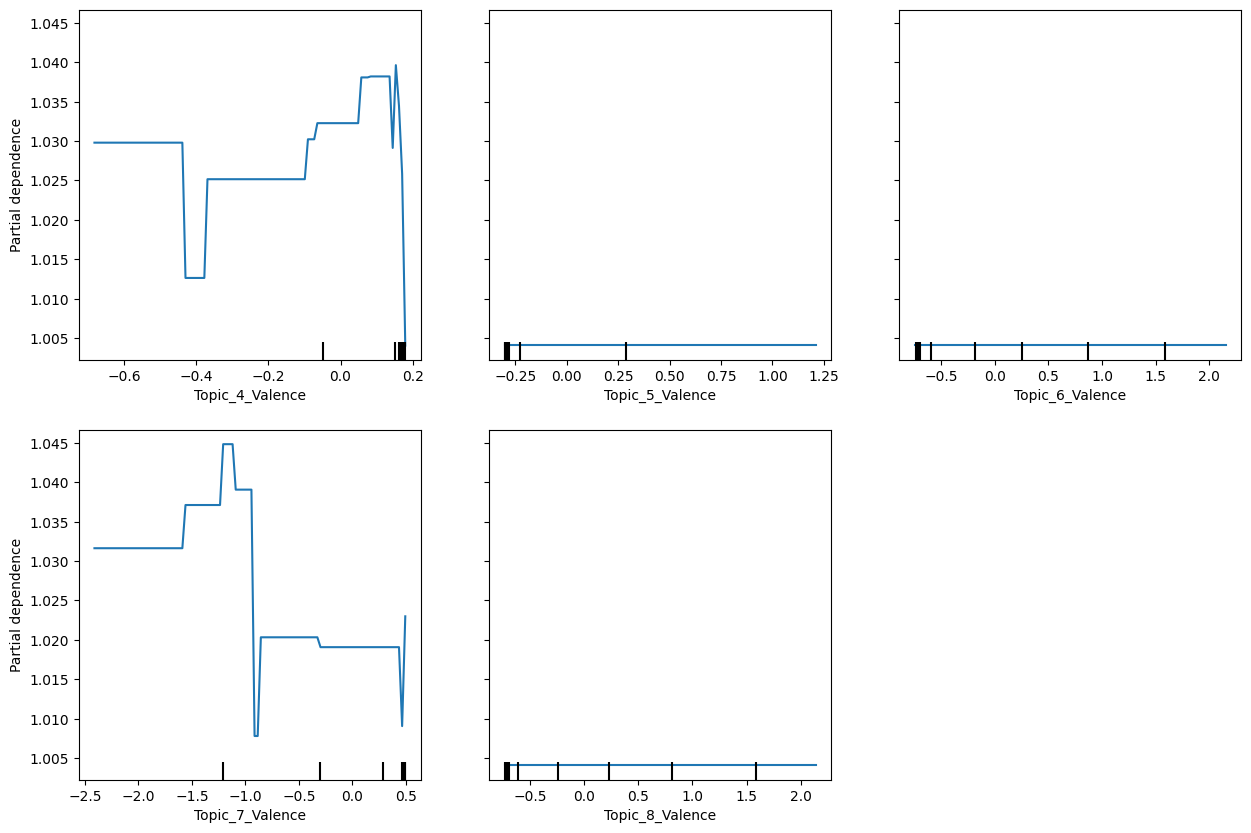

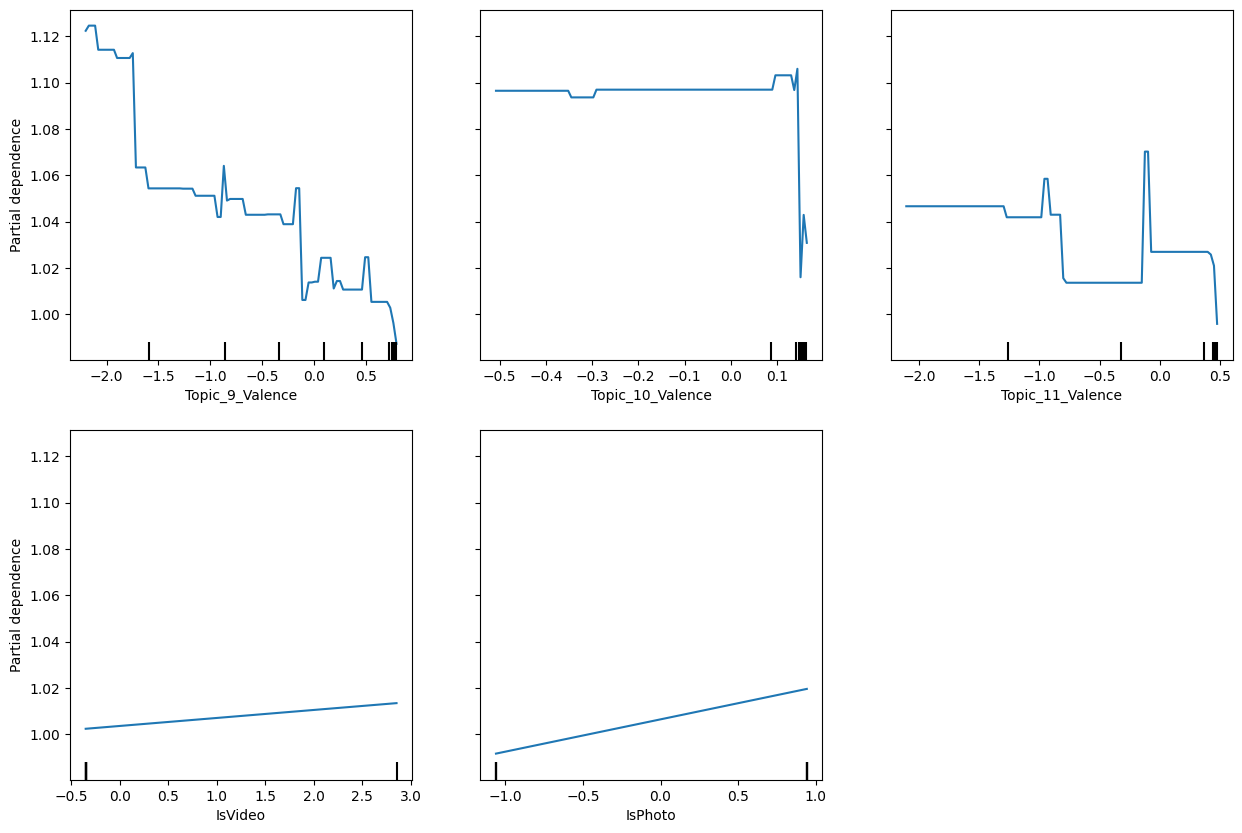

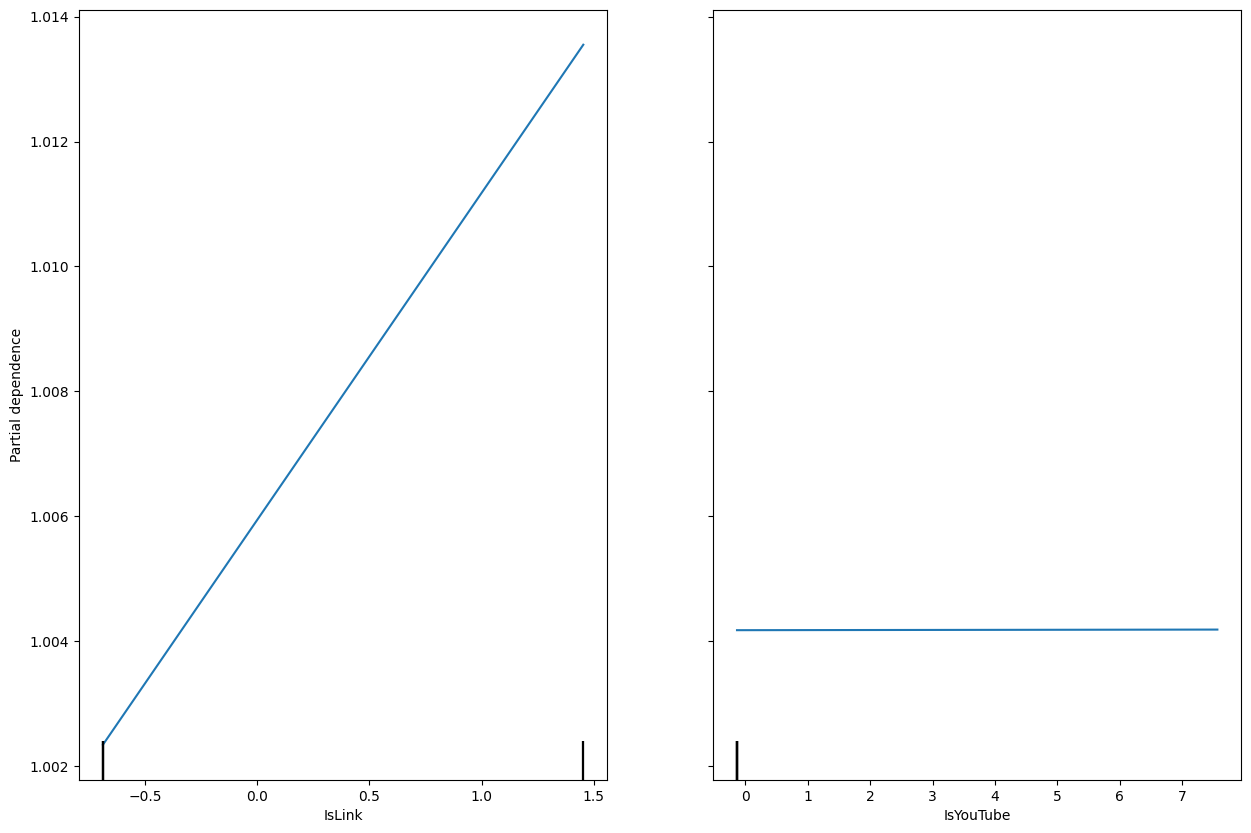

In [17]:
dataset3 = dataset3.dropna()
X = dataset3.drop(columns=['Total Interactions'])
y = dataset3['Total Interactions']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Model
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'objective': 'reg:squarederror', 'max_depth': 4, 'eta': 0.1}
num_rounds = 100
bst = xgb.train(params, dtrain, num_rounds)
preds_in = bst.predict(dtrain)
preds_out = bst.predict(dtest)
mseXG_in = mean_squared_error(y_train, preds_in)
mseXG_out = mean_squared_error(y_test, preds_out)
rmseXG_in = np.sqrt(mseXG_in)
rmseXG_out = np.sqrt(mseXG_out)
r2XG_in = r2_score(y_train, preds_in)
r2XG_out = r2_score(y_test, preds_out)

# Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf_in = rf.predict(X_train)
y_pred_rf_out = rf.predict(X_test)
mseRF_in = mean_squared_error(y_train, y_pred_rf_in)
mseRF_out = mean_squared_error(y_test, y_pred_rf_out)
rmseRF_in = np.sqrt(mseRF_in)
rmseRF_out = np.sqrt(mseRF_out)
r2RF_in = r2_score(y_train, y_pred_rf_in)
r2RF_out = r2_score(y_test, y_pred_rf_out)

# SVR Model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(X_train_scaled, y_train)
y_pred_svr_in = svr.predict(X_train_scaled)
y_pred_svr_out = svr.predict(X_test_scaled)
mseSVR_in = mean_squared_error(y_train, y_pred_svr_in)
mseSVR_out = mean_squared_error(y_test, y_pred_svr_out)
rmseSVR_in = np.sqrt(mseSVR_in)
rmseSVR_out = np.sqrt(mseSVR_out)
r2SVR_in = r2_score(y_train, y_pred_svr_in)
r2SVR_out = r2_score(y_test, y_pred_svr_out)

# Poisson Regression
y_train = y_train + 1
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)
poissonModel = sm.GLM(y_train, X_train_const, family=sm.families.Poisson()).fit()
y_pred_poisson_in = poissonModel.predict(X_train_const)
y_pred_poisson_out = poissonModel.predict(X_test_const)
msePR_in = mean_squared_error(y_train, y_pred_poisson_in)
msePR_out = mean_squared_error(y_test, y_pred_poisson_out)
rmsePR_in = np.sqrt(msePR_in)
rmsePR_out = np.sqrt(msePR_out)
r2PR_in = r2_score(y_train, y_pred_poisson_in)
r2PR_out = r2_score(y_test, y_pred_poisson_out)

# Print the summary of Poisson Regression model
print(poissonModel.summary())

# Print RMSE, MSE, and R² for both in-sample and out-sample
print(f"XGBoost - In-sample RMSE: {rmseXG_in}, MSE: {mseXG_in}, R²: {r2XG_in}")
print(f"XGBoost - Out-sample RMSE: {rmseXG_out}, MSE: {mseXG_out}, R²: {r2XG_out}")
print(f"Random Forest - In-sample RMSE: {rmseRF_in}, MSE: {mseRF_in}, R²: {r2RF_in}")
print(f"Random Forest - Out-sample RMSE: {rmseRF_out}, MSE: {mseRF_out}, R²: {r2RF_out}")
print(f"SVR - In-sample RMSE: {rmseSVR_in}, MSE: {mseSVR_in}, R²: {r2SVR_in}")
print(f"SVR - Out-sample RMSE: {rmseSVR_out}, MSE: {mseSVR_out}, R²: {r2SVR_out}")
print(f"Poisson Regression - In-sample RMSE: {rmsePR_in}, MSE: {msePR_in}, R²: {r2PR_in}")
print(f"Poisson Regression - Out-sample RMSE: {rmsePR_out}, MSE: {msePR_out}, R²: {r2PR_out}")

# Finding out the best model based on multiple metrics
metrics = {
    'XGBoost': {'RMSE_in': rmseXG_in, 'MSE_in': mseXG_in, 'R²_in': r2XG_in, 'RMSE_out': rmseXG_out, 'MSE_out': mseXG_out, 'R²_out': r2XG_out},
    'Random Forest': {'RMSE_in': rmseRF_in, 'MSE_in': mseRF_in, 'R²_in': r2RF_in, 'RMSE_out': rmseRF_out, 'MSE_out': mseRF_out, 'R²_out': r2RF_out},
    'SVR': {'RMSE_in': rmseSVR_in, 'MSE_in': mseSVR_in, 'R²_in': r2SVR_in, 'RMSE_out': rmseSVR_out, 'MSE_out': mseSVR_out, 'R²_out': r2SVR_out},
    'Poisson Regression': {'RMSE_in': rmsePR_in, 'MSE_in': msePR_in, 'R²_in': r2PR_in, 'RMSE_out': rmsePR_out, 'MSE_out': msePR_out, 'R²_out': r2PR_out}
}

# Determine the best model based on each metric
best_model_name_rmse_in = min(metrics, key=lambda x: metrics[x]['RMSE_in'])
best_model_name_mse_in = min(metrics, key=lambda x: metrics[x]['MSE_in'])
best_model_name_r2_in = max(metrics, key=lambda x: metrics[x]['R²_in'])
best_model_name_rmse_out = min(metrics, key=lambda x: metrics[x]['RMSE_out'])
best_model_name_mse_out = min(metrics, key=lambda x: metrics[x]['MSE_out'])
best_model_name_r2_out = max(metrics, key=lambda x: metrics[x]['R²_out'])

best_models = [
    best_model_name_rmse_in, best_model_name_mse_in, best_model_name_r2_in,
    best_model_name_rmse_out, best_model_name_mse_out, best_model_name_r2_out
]
best_model_counts = {model: best_models.count(model) for model in set(best_models)}

best_model_name = max(best_model_counts, key=best_model_counts.get)

print(f"Best Predictive Model: {best_model_name}")

# Plotting the Feature Importance for the best model
if best_model_name == 'XGBoost':
    model = xgb.XGBRegressor()
    model.fit(X_train, y_train)
    importance = model.feature_importances_
    features = X_train.columns
    print("Feature Importance Scores for XGBoost:")
    for feature, score in zip(features, importance):
        print(f"{feature}: {score}")
    plt.figure(figsize=(10, 6))
    plt.barh(features, importance)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance for XGBoost')
    plt.show()
elif best_model_name == 'Random Forest':
    importance = rf.feature_importances_
    features = X_train.columns
    print("Feature Importance Scores for Random Forest:")
    for feature, score in zip(features, importance):
        print(f"{feature}: {score}")
    plt.figure(figsize=(10, 6))
    plt.barh(features, importance)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance for Random Forest')
    plt.show()
elif best_model_name == 'SVR':
    print("SVR does not have built-in feature importance.")
else:
    print("Feature importance plots are not typically used for Poisson Regression.")

# Plotting the Partial Dependency Graphs for the best model
def plot_partial_dependence(model, X_train, n_features=5):
    features = [i for i in range(X_train.shape[1])]
    for i in range(0, len(features), n_features):
        subset = features[i:i + n_features]
        fig, ax = plt.subplots(figsize=(15, 10))
        PartialDependenceDisplay.from_estimator(model, X_train, features=subset, ax=ax)
        plt.show()

if best_model_name == 'XGBoost':
    plot_partial_dependence(model, X_train)
elif best_model_name == 'Random Forest':
    plot_partial_dependence(rf, X_train)
elif best_model_name == 'SVR':
    plot_partial_dependence(svr, X_train_scaled)
else:
    print("Partial dependence plots are not typically used for Poisson Regression.")